In [6]:
import os
import pandas as pd
import glob
import stagger
from stagger import read_tag

import librosa
from librosa import feature

from matplotlib import pyplot as plt
from librosa import display
import seaborn as sns
import numpy as np


In [11]:

#wykrycie ścieżki, w której przechowuje pliki i program
working_directory = os.getcwd()
path = working_directory + '/wrapped/big data projekt/*.mp3'

#probka 5 utworow
songs = [working_directory + '/wrapped/big data projekt/15 Step.mp3',working_directory + '/wrapped/big data projekt/A Forest.mp3',working_directory + '/wrapped/big data projekt/Antitaxi.mp3' , working_directory + '/wrapped/big data projekt/Starman - 2012 Remaster.mp3',working_directory + '/wrapped/big data projekt/sleepwalker.mp3']

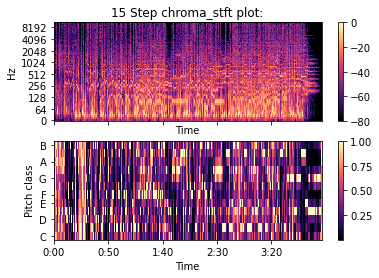

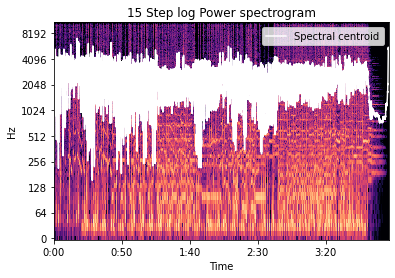

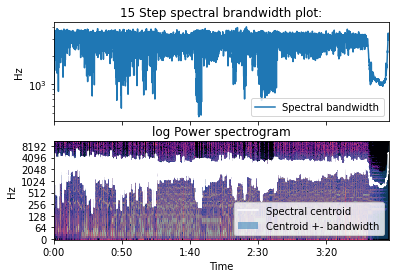

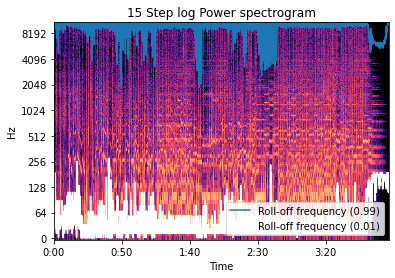

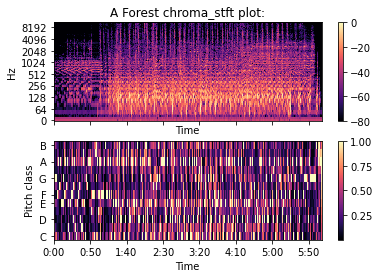

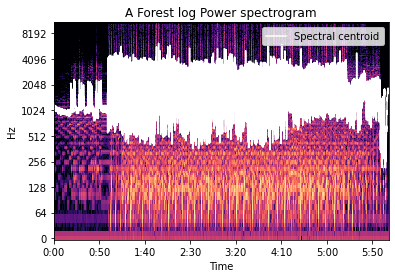

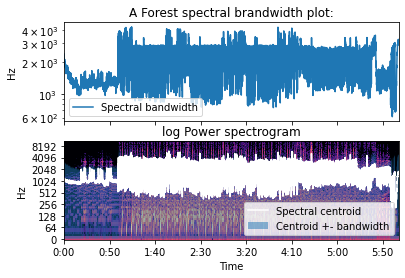

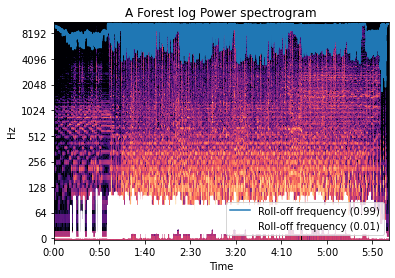

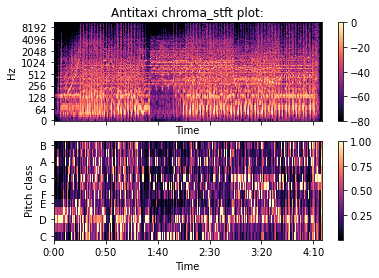

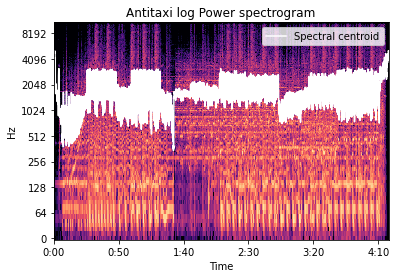

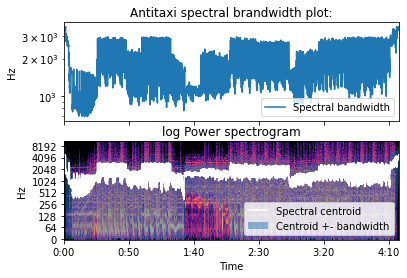

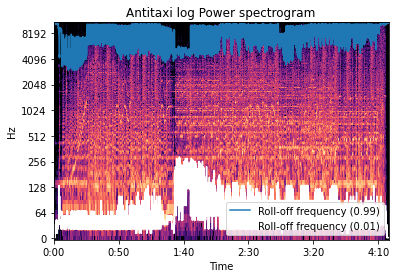

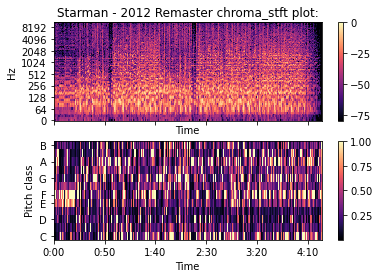

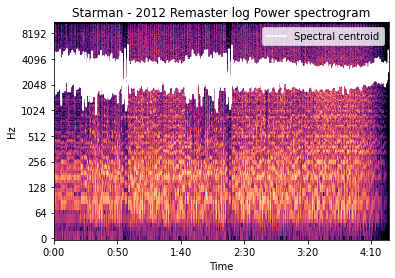

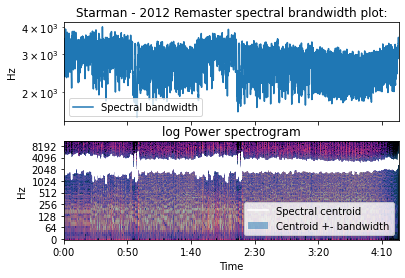

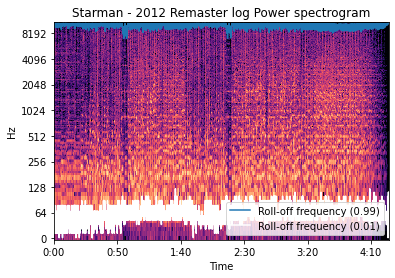

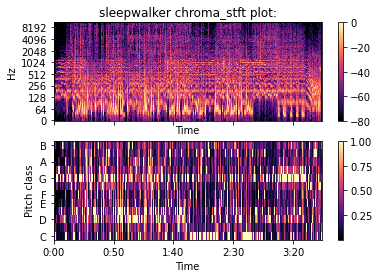

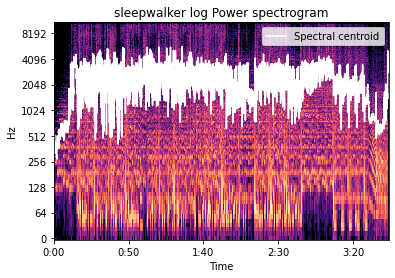

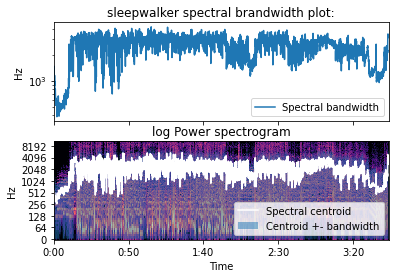

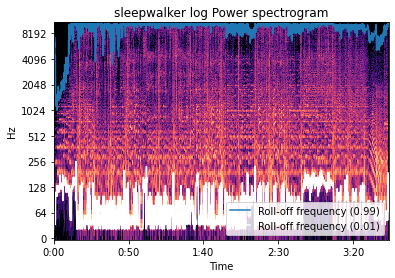

In [12]:
for song in songs:
    mp3 = stagger.read_tag(song) #pobranie nazwy piosenki
    y, sr = librosa.load(song, sr=22858) #ustawiam czestotliwosc (sampling_rate na 22858 Hz)
    
    """chroma_stft"""
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    S = np.abs(librosa.stft(y))
    
    
    #stworzenie wykresu
    fig, ax = plt.subplots(nrows=2, sharex=True)
    img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                                   y_axis='log', x_axis='time', ax=ax[0])
    fig.colorbar(img, ax=[ax[0]])
    ax[0].set_title(f'{mp3.title} chroma_stft plot:')  # Tytuł pierwszego wykresu
    
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
    fig.colorbar(img, ax=[ax[1]])
    plt.show()

    
    """spectral_centroid"""
    cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    S, phase = librosa.magphase(librosa.stft(y=y))
    librosa.feature.spectral_centroid(S=S)
    freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
    librosa.feature.spectral_centroid(S=np.abs(D), freq=freqs)
    times = librosa.times_like(cent)
    
    #stworzenie wykresu
    fig, ax = plt.subplots()
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax)
    ax.plot(times, cent.T, label='Spectral centroid', color='w')
    ax.legend(loc='upper right')
    ax.set(title=f'{mp3.title} log Power spectrogram')
    
    
    """spectral_brandwidth"""
    S, phase = librosa.magphase(librosa.stft(y=y))
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
    librosa.feature.spectral_bandwidth(S=np.abs(D), freq=freqs)
    
    #stworzenie wykresu
    fig, ax = plt.subplots(nrows=2, sharex=True)
    times = librosa.times_like(spec_bw)
    centroid = librosa.feature.spectral_centroid(S=S)
    ax[0].set_title(f'{mp3.title} spectral brandwidth plot:')  # Tytuł pierwszego wykresu
    ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
    ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
    ax[0].legend()
    ax[0].label_outer()
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax[1])
    ax[1].set(title='log Power spectrogram')
    ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                    np.minimum(centroid[0] + spec_bw[0], sr/2),
                    alpha=0.5, label='Centroid +- bandwidth')
    ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
    ax[1].legend(loc='lower right')
    
    """spectrall_rolloff"""
    S, phase = librosa.magphase(librosa.stft(y=y))
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
    rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
    
    #stworzenie wykresu
    fig, ax = plt.subplots()
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                             y_axis='log', x_axis='time', ax=ax)
    ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
    ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
            label='Roll-off frequency (0.01)')
    ax.legend(loc='lower right')
    ax.set(title= f'{mp3.title} log Power spectrogram')
    
    

